<b><font size="6"> Twitter Age Prediction </b>

<b><font size="3"><p>This Notebook is for Analysis - EDA (Exploratory Data Analysis), Feature Engineering and Model Development.  </p> Production Implementation code is under src folder </b>

<b>Importing  libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000000000)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('display.max_colwidth', 1000000)

In [2]:
'''
This is same as setting PYTHONPATH
'''
import sys
sys.path.append("/Users/jatin.malhotra/Desktop/git/better")

<font size="3"><b>Loading CSV Dataset

In [3]:
df_mentions = pd.read_csv('../data/mentions.csv')
df_friends = pd.read_csv('../data/friends.csv')
df_ages_train = pd.read_csv('../data/ages_train.csv')
df_ages_test = pd.read_csv('../data/ages_test.csv', header=None, names=['ID'])


In [4]:
df_ages_train.shape

(1711, 2)

In [5]:
df_ages_train.head(2)

,ID,Age
0,23605717,21
1,781084760,19


In [6]:
df_ages_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      1711 non-null   int64
 1   Age     1711 non-null   int64
dtypes: int64(2)
memory usage: 26.9 KB


In [7]:
df_ages_train['Age'].describe()

count   1711.000000
mean      22.210403
std        7.220109
min       18.000000
25%       19.000000
50%       21.000000
75%       22.000000
max      111.000000
Name: Age, dtype: float64

<font size="3"><b> Checking Age Distribution

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from scipy.stats import norm, skew
    
def distribution_plot(df, col):

    figure = plt.figure(figsize=(18,10))
    plt.subplot(1,2,1)
    sns.distplot(df[col] , fit=norm);
    (mu, sigma) = norm.fit( df[col])
    plt.ylabel('Frequency')
    plt.title('Distribution')


    plt.subplot(1,2,2)
    stats.probplot(df[col], plot=plt)
    plt.show()

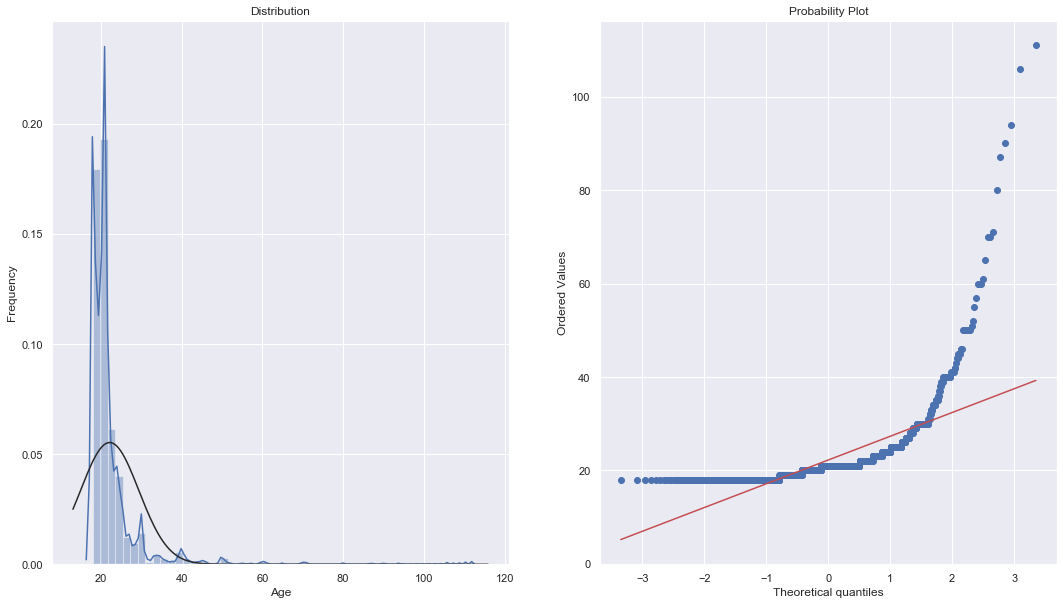

In [9]:
distribution_plot(df_ages_train, 'Age')

In [10]:
df_ages_train['Age'].value_counts(bins=10)

(17.906, 27.3]    1548
(27.3, 36.6]       100
(36.6, 45.9]        35
(45.9, 55.2]        13
(55.2, 64.5]         5
(64.5, 73.8]         4
(83.1, 92.4]         2
(101.7, 111.0]       2
(73.8, 83.1]         1
(92.4, 101.7]        1
Name: Age, dtype: int64

In [11]:
df_ages_train.ID.unique().shape

(1711,)

In [12]:
df_ages_test.head(2)

,ID
0,246677348
1,34014070


In [13]:
df_ages_test.shape

(300, 1)

In [14]:
def users_present_in_both_train_test(df_ages_train:pd.DataFrame, df_ages_test:pd.DataFrame):
    users_in_train_and_test_data=[]
    
    for user in df_ages_train.ID.unique():
        if user in df_ages_test.ID.unique().tolist():
            users_in_train_and_test_data.append(user)
    
    return users_in_train_and_test_data
        

In [15]:
print("Total Users in Test Dataset: ", len(df_ages_test))

print("Users present in both Train and Test Dataset: ", len(users_present_in_both_train_test(df_ages_train, df_ages_test)))

Total Users in Test Dataset:  300
Users present in both Train and Test Dataset:  300


<font size=4><b> Vaow! Test Data Set is just a sample of Train Dataset... Well, lets divide Train Data into Train and Test Split using the Test Data Users

In [16]:
df_mentions.shape

(17695, 3)

In [17]:
df_mentions[df_mentions.ID==612815277]

,ID,MentionedID,MentionedHandle
0,612815277,798747864,AlenaBacalia
1,612815277,354590068,hfholden34
2,612815277,401111769,MarilynYousif
3,612815277,35581752,heeeeyerin
4,612815277,1591956090,DogeTheDog
5,612815277,27356974,MrJeffJ
6,612815277,378734536,LindsayGorncy
7,612815277,30008146,tigers


In [18]:
df_mentions.ID.value_counts().to_frame().head(10)

,ID
315555817,51
2207254850,51
283449093,42
455777416,42
184928826,40
69856018,40
471401606,39
25953256,37
68877665,36
165163852,35


In [19]:
df_mentions.ID.value_counts().to_frame().tail(10)

,ID
844338115,1
818380764,1
72078217,1
862290169,1
34623318,1
87571990,1
2647789536,1
274875320,1
35362627,1
878793648,1


In [20]:
df_mentions_count = df_mentions.ID.value_counts().to_frame().reset_index()

In [21]:
df_mentions_count.columns=['ID', 'mentions_count']

In [22]:
df_mentions_count.head(3)

,ID,mentions_count
0,315555817,51
1,2207254850,51
2,283449093,42


In [23]:
len(df_mentions.MentionedID.unique())

10744

In [24]:
df_friends.ID.unique().shape

(2342,)

In [25]:
df_friends.head(10)

,ID,FriendID
0,612815277,574147452
1,612815277,36767299
2,612815277,29374598
3,612815277,67634814
4,612815277,30008146
5,612815277,16826656
6,612815277,18219438
7,612815277,85920189
8,612815277,183654112
9,612815277,368540737


In [26]:
df_friends.ID.value_counts().to_frame().head(10)

,ID
612815277,20
1534955306,20
487646498,20
447535938,20
2195817611,20
2733135521,20
15175682,20
468060355,20
185402524,20
329669768,20


<font size = 4> <b> <p>Load User Objects (users, friends, mentiones) JSON data <p></b>
 <font size = 4>   Loading data takes time so loading it once and caching it speeds up the process everytime I run the load 

In [27]:
import json
import pandas as pd
import pickle
import os

def load_url_data(profile_url, profile_path, cache_file=True):
    
    cache_path =str(profile_path) + ".cache.pickle"
    
    if cache_file and os.path.exists(cache_path):
        print("Loading user_profile from cache: " + cache_path)
        with open(cache_path, 'rb') as f:
            cache = pickle.load(f)
            data = cache
    else:
        data = pd.read_json(profile_url)
        if cache_file:
            print("Dumping cache: " + cache_path)
            with open(cache_path, 'wb') as f:
                pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
                
    return data
            
    

In [28]:
user_profile_url = 'https://buapp-prod.s3.amazonaws.com/resources/hiring_ml_engineer_resources/age_profiles.json'
df_user_profile =load_url_data(user_profile_url, 'user_profile')


friends_profile_url = 'https://buapp-prod.s3.amazonaws.com/resources/hiring_ml_engineer_resources/friend_profiles.json'
df_friends_profile =load_url_data(friends_profile_url, 'friends_profile')


mention_profile_url = 'https://buapp-prod.s3.amazonaws.com/resources/hiring_ml_engineer_resources/mention_profiles.json'
df_mention_profile =load_url_data(mention_profile_url, 'mention_profile')


tweets_url = 'https://buapp-prod.s3.amazonaws.com/resources/hiring_ml_engineer_resources/age_tweets.json'
df_tweets =load_url_data(tweets_url, 'tweets')


Loading user_profile from cache: user_profile.cache.pickle
Loading user_profile from cache: friends_profile.cache.pickle
Loading user_profile from cache: mention_profile.cache.pickle
Loading user_profile from cache: tweets.cache.pickle


<font size = 5> <b> TWEET OBJECT EDA

In [29]:
df_tweets.head(2)

,in_reply_to_status_id,coordinates,text,lang,in_reply_to_user_id_str,metadata,user,place,geo,retweeted_status,contributors,in_reply_to_screen_name,entities,id_str,favorited,in_reply_to_status_id_str,retweet_count,created_at,id,source,truncated,in_reply_to_user_id,favorite_count,retweeted,possibly_sensitive
0,NaN,None,RT @AlenaBacalia: i over think and second guess everything way too much,en,NaN,"{'result_type': 'recent', 'iso_language_code': 'en'}","{'follow_request_sent': False, 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/477666282871861249/Z62rKDZE_normal.jpeg', 'id_str': '612815277', 'name': 'Greggy', 'time_zone': 'Atlantic Time (Canada)', 'lang': 'en', 'profile_text_color': '333333', 'following': False, 'description': 'You'll never find another one like me.', 'protected': False, 'listed_count': 1, 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif', 'geo_enabled': True, 'profile_background_tile': True, 'profile_sidebar_fill_color': 'EFEFEF', 'location': '', 'favourites_count': 7937, 'profile_sidebar_border_color': 'EEEEEE', 'default_profile_image': False, 'profile_background_color': '131516', 'contributors_enabled': False, 'statuses_count': 12236, 'default_profile': False, 'entities': {'description': {'urls': []}}, 'profile_image_url': 'http://pbs.twimg.com/profile_images/477666282871861249/Z62rKDZE_normal.jpeg', 'verified': False, 'screen_name': 'agregtoremember', 'notifications': False, 'friends_count': 265, 'created_at': 'Tue Jun 19 17:54:58 +0000 2012', 'utc_offset': -10800, 'id': 612815277, 'is_translation_enabled': False, 'profile_link_color': '009999', 'url': None, 'is_translator': False, 'followers_count': 273, 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/612815277/1400624131', 'profile_use_background_image': True}",None,None,"{'in_reply_to_status_id': None, 'coordinates': None, 'text': 'i over think and second guess everything way too much', 'lang': 'en', 'in_reply_to_user_id_str': None, 'metadata': {'result_type': 'recent', 'iso_language_code': 'en'}, 'user': {'follow_request_sent': False, 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/513876108186767360/lyQSnW6n_normal.jpeg', 'id_str': '798747864', 'name': 'lena', 'time_zone': None, 'lang': 'en', 'profile_text_color': '333333', 'following': False, 'description': '19 | the mitten', 'protected': False, 'listed_count': 0, 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'geo_enabled': False, 'profile_background_tile': False, 'profile_sidebar_fill_color': 'DDEEF6', 'location': '', 'favourites_count': 3470, 'profile_sidebar_border_color': 'C0DEED', 'default_profile_image': False, 'profile_background_color': 'C0DEED', 'contributors_enabled': False, 'statuses_count': 2703, 'default_profile': True, 'entities': {'url': {'urls': [{'display_url': 'itsaleeena.tumblr.com', 'expanded_url': 'http://itsaleeena.tumblr.com', 'url': 'http://t.co/KC0YZfgO4y', 'indices': [0, 22]}]}, 'description': {'urls': []}}, 'profile_image_url': 'http://pbs.twimg.com/profile_images/513876108186767360/lyQSnW6n_normal.jpeg', 'verified': False, 'screen_name': 'AlenaBacalia', 'notifications': False, 'friends_count': 227, 'created_at': 'Sun Sep 02 17:57:37 +0000 2012', 'utc_offset': None, 'id': 798747864, 'is_translation_enabled': False, 'profile_link_color': '0084B4', 'url': 'http://t.co/KC0YZfgO4y', 'is_translator': False, 'followers_count': 395, 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/798747864/1409718835', 'profile_use_background_image': True}, 'place': None, 'geo': None, 'contributors': None, 'in_reply_to_screen_name': None, 'entities': {'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': []}, 'id_str': '515359279579410432', 'source': '<a href=""http://twitter.com/dow

In [30]:
df_tweets.shape

(28138, 25)

In [31]:
df_tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28138 entries, 0 to 28137
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   in_reply_to_status_id      4839 non-null   float64            
 1   coordinates                1298 non-null   object             
 2   text                       28138 non-null  object             
 3   lang                       28138 non-null  object             
 4   in_reply_to_user_id_str    5299 non-null   float64            
 5   metadata                   28138 non-null  object             
 6   user                       28138 non-null  object             
 7   place                      1341 non-null   object             
 8   geo                        1298 non-null   object             
 9   retweeted_status           7645 non-null   object             
 10  contributors               0 non-null      float64            
 11  in

In [32]:
df_tweets.describe()

,in_reply_to_status_id,in_reply_to_user_id_str,contributors,id_str,in_reply_to_status_id_str,retweet_count,id,in_reply_to_user_id,favorite_count,possibly_sensitive
count,4839.000000,5299.000000,0.000000,28138.000000,4839.000000,28138.000000,28138.000000,5299.000000,28138.000000,8168.000000
mean,515058332396179712.000000,658457680.662389,NaN,515326422855582464.000000,515058332396179712.000000,578.623214,515326422855582464.000000,658457680.662389,0.476438,0.020813
std,7132846233866518.000000,765944186.505184,NaN,703425827700419.250000,7132846233866518.000000,5369.071823,703425827700419.250000,765944186.505184,7.386489,0.142766
min,105372771084812288.000000,46023.000000,NaN,512992536554926080.000000,105372771084812288.000000,0.000000,512992536554926080.000000,46023.000000,0.000000,0.000000
25%,514941493048784896.000000,152126446.000000,NaN,514988235770009600.000000,514941493048784896.000000,0.000000,514988235770009600.000000,152126446.000000,0.000000,0.000000
50%,515554208821829632.000000,350069503.000000,NaN,515574163751579648.000000,515554208821829632.000000,0.000000,515574163751579648.000000,350069503.000000,0.000000,0.000000
75%,515885526973503488.000000,791049271.000000,NaN,515882540799121408.000000,515885526973503488.000000,1.000000,515882540799121408.000000,791049271.000000,0.000000,0.000000
max,516081213639897088.000000,2832293652.000000,NaN,516082911603621888.000000,516081213639897088.000000,232629.000000,516082911603621888.000000,2832293652.000000,681.000000,1.000000


In [33]:
df_tweets.isna().sum().sort_values(ascending=False)

contributors                 28138
coordinates                  26840
geo                          26840
place                        26797
in_reply_to_status_id        23299
in_reply_to_status_id_str    23299
in_reply_to_user_id          22839
in_reply_to_user_id_str      22839
in_reply_to_screen_name      22839
retweeted_status             20493
possibly_sensitive           19970
user                             0
metadata                         0
id_str                           0
favorited                        0
lang                             0
retweet_count                    0
created_at                       0
id                               0
source                           0
truncated                        0
text                             0
favorite_count                   0
retweeted                        0
entities                         0
dtype: int64

In [34]:
'''
Parse USER_ID from user column: user column is a replica of user profile object. 
'''

df_tweets['user_id'] = pd.json_normalize(df_tweets.user)['id']


In [35]:
df_tweets.head(1)

,in_reply_to_status_id,coordinates,text,lang,in_reply_to_user_id_str,metadata,user,place,geo,retweeted_status,contributors,in_reply_to_screen_name,entities,id_str,favorited,in_reply_to_status_id_str,retweet_count,created_at,id,source,truncated,in_reply_to_user_id,favorite_count,retweeted,possibly_sensitive,user_id
0,NaN,None,RT @AlenaBacalia: i over think and second guess everything way too much,en,NaN,"{'result_type': 'recent', 'iso_language_code': 'en'}","{'follow_request_sent': False, 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/477666282871861249/Z62rKDZE_normal.jpeg', 'id_str': '612815277', 'name': 'Greggy', 'time_zone': 'Atlantic Time (Canada)', 'lang': 'en', 'profile_text_color': '333333', 'following': False, 'description': 'You'll never find another one like me.', 'protected': False, 'listed_count': 1, 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif', 'geo_enabled': True, 'profile_background_tile': True, 'profile_sidebar_fill_color': 'EFEFEF', 'location': '', 'favourites_count': 7937, 'profile_sidebar_border_color': 'EEEEEE', 'default_profile_image': False, 'profile_background_color': '131516', 'contributors_enabled': False, 'statuses_count': 12236, 'default_profile': False, 'entities': {'description': {'urls': []}}, 'profile_image_url': 'http://pbs.twimg.com/profile_images/477666282871861249/Z62rKDZE_normal.jpeg', 'verified': False, 'screen_name': 'agregtoremember', 'notifications': False, 'friends_count': 265, 'created_at': 'Tue Jun 19 17:54:58 +0000 2012', 'utc_offset': -10800, 'id': 612815277, 'is_translation_enabled': False, 'profile_link_color': '009999', 'url': None, 'is_translator': False, 'followers_count': 273, 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme14/bg.gif', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/612815277/1400624131', 'profile_use_background_image': True}",None,None,"{'in_reply_to_status_id': None, 'coordinates': None, 'text': 'i over think and second guess everything way too much', 'lang': 'en', 'in_reply_to_user_id_str': None, 'metadata': {'result_type': 'recent', 'iso_language_code': 'en'}, 'user': {'follow_request_sent': False, 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/513876108186767360/lyQSnW6n_normal.jpeg', 'id_str': '798747864', 'name': 'lena', 'time_zone': None, 'lang': 'en', 'profile_text_color': '333333', 'following': False, 'description': '19 | the mitten', 'protected': False, 'listed_count': 0, 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'geo_enabled': False, 'profile_background_tile': False, 'profile_sidebar_fill_color': 'DDEEF6', 'location': '', 'favourites_count': 3470, 'profile_sidebar_border_color': 'C0DEED', 'default_profile_image': False, 'profile_background_color': 'C0DEED', 'contributors_enabled': False, 'statuses_count': 2703, 'default_profile': True, 'entities': {'url': {'urls': [{'display_url': 'itsaleeena.tumblr.com', 'expanded_url': 'http://itsaleeena.tumblr.com', 'url': 'http://t.co/KC0YZfgO4y', 'indices': [0, 22]}]}, 'description': {'urls': []}}, 'profile_image_url': 'http://pbs.twimg.com/profile_images/513876108186767360/lyQSnW6n_normal.jpeg', 'verified': False, 'screen_name': 'AlenaBacalia', 'notifications': False, 'friends_count': 227, 'created_at': 'Sun Sep 02 17:57:37 +0000 2012', 'utc_offset': None, 'id': 798747864, 'is_translation_enabled': False, 'profile_link_color': '0084B4', 'url': 'http://t.co/KC0YZfgO4y', 'is_translator': False, 'followers_count': 395, 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/798747864/1409718835', 'profile_use_background_image': True}, 'place': None, 'geo': None, 'contributors': None, 'in_reply_to_screen_name': None, 'entities': {'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': []}, 'id_str': '515359279579410432', 'source': '<a href=""http://twitter

In [36]:
df_tweets['metadata'].value_counts().to_frame().head(10)

,metadata
"{'result_type': 'recent', 'iso_language_code': 'en'}",24605
"{'result_type': 'recent', 'iso_language_code': 'und'}",1424
"{'result_type': 'recent', 'iso_language_code': 'tl'}",515
"{'result_type': 'recent', 'iso_language_code': 'in'}",461
"{'result_type': 'recent', 'iso_language_code': 'es'}",269
"{'result_type': 'recent', 'iso_language_code': 'ar'}",131
"{'result_type': 'recent', 'iso_language_code': 'ht'}",93
"{'result_type': 'recent', 'iso_language_code': 'pt'}",93
"{'result_type': 'recent', 'iso_language_code': 'th'}",89
"{'result_type': 'recent', 'iso_language_code': 'nl'}",72


In [37]:
df_tweets['coordinates'].value_counts().to_frame().head(10)

,coordinates
"{'type': 'Point', 'coordinates': [120.8032344, 14.8576781]}",11
"{'type': 'Point', 'coordinates': [-90.5562803, 41.4941617]}",10
"{'type': 'Point', 'coordinates': [-82.74019541, 27.8018018]}",6
"{'type': 'Point', 'coordinates': [-84.329154, 33.8282342]}",6
"{'type': 'Point', 'coordinates': [-97.8433951, 30.5229312]}",6
"{'type': 'Point', 'coordinates': [-2.5769663, 53.3933165]}",6
"{'type': 'Point', 'coordinates': [-82.78985037, 28.0]}",5
"{'type': 'Point', 'coordinates': [121.0836641, 14.3291226]}",5
"{'type': 'Point', 'coordinates': [-2.1774562, 53.0109764]}",4
"{'type': 'Point', 'coordinates': [27.812361, -26.2263344]}",4


In [38]:
df_tweets['possibly_sensitive'].value_counts()

0.000000    7998
1.000000     170
Name: possibly_sensitive, dtype: int64

In [39]:

'''
favorited: feature does not make sense as it has just one value - False
'''
df_tweets['favorited'].value_counts()


False    28138
Name: favorited, dtype: int64

In [40]:

'''
retweeted: feature does not make sense as it has just one value - False
'''
df_tweets['retweeted'].value_counts()



False    28138
Name: retweeted, dtype: int64

In [41]:

'''
truncated: feature does not make sense as it has just one value - False
'''
df_tweets['truncated'].value_counts()

False    28138
Name: truncated, dtype: int64

In [42]:
TWEET_FEATURES = ['text', 'lang', 'user_id', 'retweet_count', 'created_at', 'id', 'source',
                 'favorite_count', 'possibly_sensitive', 'entities']


In [43]:
df_tweets = df_tweets[TWEET_FEATURES]


In [44]:
'''
Parse Tweet Source as it may have meaningfull information
'''
from bs4 import BeautifulSoup
df_tweets['source_parsed'] = df_tweets['source'].apply(lambda x: BeautifulSoup(str(x),'html.parser').text)

In [45]:
df_tweets.head(2)

,text,lang,user_id,retweet_count,created_at,id,source,favorite_count,possibly_sensitive,entities,source_parsed
0,RT @AlenaBacalia: i over think and second guess everything way too much,en,612815277,7,2014-09-26 05:55:45+00:00,515379174454747136,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0,NaN,"{'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': [{'id': 798747864, 'indices': [3, 16], 'screen_name': 'AlenaBacalia', 'id_str': '798747864', 'name': 'lena'}]}",Twitter for iPhone
1,RT @hfholden34: I've wasted too much time on the wrong people,en,612815277,80,2014-09-26 05:58:17+00:00,515379813670854656,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0,NaN,"{'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': [{'id': 354590068, 'indices': [3, 14], 'screen_name': 'hfholden34', 'id_str': '354590068', 'name': 'Hannah Holden'}]}",Twitter for iPhone


In [46]:
df_tweets['source_parsed'].value_counts(normalize=True)*100

Twitter for iPhone            54.872415
Twitter for Android           18.100078
Instagram                      5.341531
Twitter Web Client             5.025233
IFTTT                          1.709432
Echofon                        1.499751
Twitter for iPad               1.226100
Twittascope                    1.187007
Twitter for Windows Phone      1.055512
Mobile Web (M5)                0.863601
Facebook                       0.749876
Twitter for BlackBerry®        0.742768
TweetCaster for Android        0.636150
Plume for Android              0.625489
Twitter for Android Tablets    0.493994
Tweetbot for iΟS               0.462009
Tweetlogix                     0.412254
iOS                            0.394484
Unfollowers.me                 0.376715
TweetDeck                      0.341176
Mobile Web (M2)                0.341176
Twitter for Websites           0.291421
Cloudhopper                    0.209681
fllwrs                         0.202573
Tumblr                         0.199019


In [47]:
from datetime import datetime
def get_day_of_week(date):
    """
    input: date
    purpose: extracts day of the week from date
    output: day of the week
    """
    l_day_of_week = date.strftime('%A')

    
    return l_day_of_week #week_mapper(l_day_of_week)

In [48]:
df_tweets['creation_day_of_week'] = df_tweets['created_at'].apply(lambda x: get_day_of_week(x))

In [49]:
df_tweets.drop(columns = ['created_at', 'source'], inplace=True)

In [50]:
df_tweets.head(2)

,text,lang,user_id,retweet_count,id,favorite_count,possibly_sensitive,entities,source_parsed,creation_day_of_week
0,RT @AlenaBacalia: i over think and second guess everything way too much,en,612815277,7,515379174454747136,0,NaN,"{'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': [{'id': 798747864, 'indices': [3, 16], 'screen_name': 'AlenaBacalia', 'id_str': '798747864', 'name': 'lena'}]}",Twitter for iPhone,Friday
1,RT @hfholden34: I've wasted too much time on the wrong people,en,612815277,80,515379813670854656,0,NaN,"{'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': [{'id': 354590068, 'indices': [3, 14], 'screen_name': 'hfholden34', 'id_str': '354590068', 'name': 'Hannah Holden'}]}",Twitter for iPhone,Friday


In [51]:
df_tweets['lang'].value_counts()

en     24605
und     1424
tl       515
in       461
es       269
ar       131
ht        93
pt        93
th        89
nl        72
ja        49
fr        43
it        42
et        40
sk        32
pl        29
de        25
sv        24
ko        19
da        14
fi        13
tr        10
lv         7
vi         7
no         6
lt         6
zh         5
sl         5
hu         4
iw         2
ru         1
hi         1
el         1
bg         1
Name: lang, dtype: int64

In [52]:

df_tweets['user_id'].value_counts().to_frame().head(10)

,user_id
2366660952,20
208174517,20
321547376,20
310058378,20
166799040,20
217009280,20
52910892,20
735086305,20
333132730,20
138947254,20


In [53]:
df_tweets.head(5)

,text,lang,user_id,retweet_count,id,favorite_count,possibly_sensitive,entities,source_parsed,creation_day_of_week
0,RT @AlenaBacalia: i over think and second guess everything way too much,en,612815277,7,515379174454747136,0,NaN,"{'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': [{'id': 798747864, 'indices': [3, 16], 'screen_name': 'AlenaBacalia', 'id_str': '798747864', 'name': 'lena'}]}",Twitter for iPhone,Friday
1,RT @hfholden34: I've wasted too much time on the wrong people,en,612815277,80,515379813670854656,0,NaN,"{'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': [{'id': 354590068, 'indices': [3, 14], 'screen_name': 'hfholden34', 'id_str': '354590068', 'name': 'Hannah Holden'}]}",Twitter for iPhone,Friday
2,I'm already gone.,en,612815277,1,515380190361288704,1,NaN,"{'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': []}",Twitter for iPhone,Friday
3,I'm already something to someone that I don't know. When will I know?,en,612815277,0,515380273005854721,1,NaN,"{'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': []}",Twitter for iPhone,Friday
4,"I don't know what I'm doing with my life, but all I know if that I'm doing it for me.",en,612815277,0,515412946608852992,1,NaN,"{'hashtags': [], 'urls': [], 'symbols': [], 'user_mentions': []}",Twitter for Android,Friday


In [54]:
df_mention_profile[df_mention_profile.id==354590068]

,screen_name,follow_request_sent,following,profile_banner_url,profile_text_color,id_str,notifications,id,friends_count,entities,profile_image_url,default_profile_image,listed_count,name,profile_background_image_url,profile_sidebar_border_color,verified,lang,profile_link_color,description,profile_background_color,profile_sidebar_fill_color,default_profile,utc_offset,is_translator,profile_use_background_image,profile_image_url_https,statuses_count,location,profile_background_image_url_https,favourites_count,followers_count,profile_background_tile,is_translation_enabled,created_at,protected,geo_enabled,time_zone,contributors_enabled,url,status
70,hfholden34,False,False,https://pbs.twimg.com/profile_banners/354590068/1411516784,333333,354590068,False,354590068,3155,"{'description': {'urls': []}, 'url': {'urls': [{'indices': [0, 22], 'expanded_url': 'http://Instagram.com/hholden34', 'display_url': 'Instagram.com/hholden34', 'url': 'http://t.co/YujDK6o0KN'}]}}",http://pbs.twimg.com/profile_images/497607482580422656/H4GAMdhX_normal.jpeg,False,13,Hannah Holden,http://abs.twimg.com/images/themes/theme1/bg.png,C0DEED,False,en,0084B4,freshman in college,C0DEED,DDEEF6,True,NaN,False,True,https://pbs.twimg.com/profile_images/497607482580422656/H4GAMdhX_normal.jpeg,28546,256,https://abs.twimg.com/images/themes/theme1/bg.png,9996,9146,False,False,2011-08-14 00:05:16+00:00,False,True,None,False,http://t.co/YujDK6o0KN,"{'truncated': False, 'retweeted': False, 'contributors': None, 'geo': None, 'place': None, 'entities': {'urls': [], 'symbols': [], 'hashtags': [], 'user_mentions': []}, 'coordinates': None, 'favorited': False, 'created_at': 'Mon Sep 29 04:33:34 +0000 2014', 'in_reply_to_screen_name': None, 'lang': 'en', 'id': 516445657955971074, 'in_reply_to_status_id': None, 'favorite_count': 41, 'in_reply_to_user_id': None, 'text': 'I was just another promise you couldn't keep', 'id_str': '516445657955971074', 'retweet_count': 22, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id_str': None, 'source': '<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>'}"


In [55]:
'''
Take first user mentioned in the tweet. Null if no user is mentioned
'''
#df_tweets['first_mention_id'] = pd.json_normalize(pd.json_normalize(pd.json_normalize(df_tweets.entities)['user_mentions'])[0])['id']







'\nTake first user mentioned in the tweet. Null if no user is mentioned\n'

In [56]:
df_tweets.drop(columns= ['entities'], inplace=True)

In [57]:
df_tweets[df_tweets.lang !='en'].head(30)

,text,lang,user_id,retweet_count,id,favorite_count,possibly_sensitive,source_parsed,creation_day_of_week
32,♌💯✔,und,264416315,0,515331571771928577,0,NaN,Twitter for Android,Friday
53,#loveit #scrapbookpics http://t.co/0w8huvX6pJ,und,97515432,0,515779250654568448,0,0.000000,Plume for Android,Saturday
57,&lt;3 http://t.co/FqJ4yCa5N4,und,97515432,0,515780729733914624,0,0.000000,Plume for Android,Saturday
71,@BEACHBOY_MILES hmmmm,und,271608323,0,515668230414012416,0,NaN,Twitter for Android,Saturday
74,@BEACHBOY_MILES okey dokey,sv,271608323,0,515671824982900736,0,NaN,Twitter for Android,Saturday
77,@semaj_oo 3,und,271608323,0,515868334299308032,0,NaN,Twitter for Android,Saturday
80,"RT @Topaz_Kid: ""@iAmReallyChris: Me 😩 http://t.co/VepcDtnUML""",und,224078321,6,515698356254150656,0,0.000000,Twitter for Android,Saturday
87,Freeeeeee @MeekMill http://t.co/mtozDuHEso,und,224078321,2,515868251709276161,0,0.000000,Twitter for Android,Saturday
95,@B3rries_ 😩😩,und,314345007,0,513697782847533056,0,NaN,Twitter for iPhone,Sunday
97,@B3rries_ @xBeautyMarkedx wahhhh😩,und,314345007,0,513698891145805824,0,NaN,Twitter for iPhone,Sunday


In [58]:
df_tweets.user_id.unique().shape

(2195,)

In [59]:
df_tweets['tweet_length'] =df_tweets['text'].apply(lambda x: len(x))



<font size=4> <b> <p>Extracting Tweet Sentiments </p>
    
    For example: Three new features can be created per user such as:
    1. Number_of_positive_Tweets
    2. Number_of_negative_Tweets
    3. Number_of_neutral_Tweets
    

<font size=4>
    
In Real Project Implementation, A NLP Sentiments Analysis model will need to be developed to classify a text into a sentiment. In other words, following will be the data requirements:-


For the purpose of this assignment, I am using a combination of TextBlob and Vader libraries to classify the Tweet content since there is no tweet training data given (Twitter data is not labelled. hence cannot be used for training).

These two libraries are pre-trained sentiment analysis models. If I do not use this library then I will have to create a labelled tweets manually and then trained a model which will be very time consuming and out of the scope of this project.

Use NLTK Vader and TextBlob library to do tweet text sentimental analyis


In [60]:
!pip install TextBlob

In [61]:
!pip install vaderSentiment

In [62]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jatin.malhotra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [63]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
def evaluate_sentiments(p_txt):

    
    text_tb = TextBlob(p_txt)

    analyzer = SentimentIntensityAnalyzer()
    text_vs = analyzer.polarity_scores(p_txt)
    
    
    if text_tb.sentiment.polarity <= 0 and text_vs['compound'] <= -0.5:
        sentiment = "negative"  # very negative
    elif text_tb.sentiment.polarity <= 0 and text_vs['compound'] <= -0.1:
        sentiment = "negative"  # somewhat negative
    elif text_tb.sentiment.polarity == 0 and text_vs['compound'] > -0.1 and text_vs['compound'] < 0.1:
        sentiment = "neutral"
    elif text_tb.sentiment.polarity >= 0 and text_vs['compound'] >= 0.1:
        sentiment = "positive"  # somewhat positive
    elif text_tb.sentiment.polarity > 0 and text_vs['compound'] >= 0.1:
        sentiment = "positive"  # very positive
    else:
        sentiment = "neutral"
   
    polarity = (text_tb.sentiment.polarity + text_vs['compound']) / 2
   
    
    if  sentiment == 'negative':
        return 1, 0, 0
    elif sentiment == 'positive':
        return 0, 0, 1
    else:
        return 0, 1, 0

In [64]:
evaluate_sentiments("I am not so sad")

(0, 1, 0)

In [ ]:
#df_tweets['tweet_sentiment'] = df_tweets['text'].apply(lambda x: evaluate_sentiments(x))

df_tweets['negative_sentiment'],df_tweets['neutral_sentiment'], df_tweets['positive_sentiment']  = zip(*df_tweets['text'].apply(lambda x: evaluate_sentiments(x)))



In [ ]:
df_user_profile[df_user_profile.id==612815277]

In [ ]:
df_tweets.rename(columns={'retweet_count':'tweets_retweet_count',
                         'favorite_count':'tweets_favorite_count'}, inplace=True)

In [ ]:
df_tweets[df_tweets.user_id==612815277]

<font size=4> <b> EMOJI's FEATURES CREATION

<font size=4> <b> <p>Number of Emoji's used in a Tweet: EMOJIS_COUNT
    

In [ ]:
!pip install emoji

In [ ]:
import emoji
import regex

def count_emojis(text):

    e_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            e_list.append(word)
    
    return len(e_list)

In [ ]:
df_tweets['emojis_count'] = df_tweets['text'].apply(lambda x: count_emojis(x))

<font size=4> <b> <p>Extract Sentiments out of Emoji's. </p>
    
    For example: Three new features can be created per user such as:
    1. Number_of_positive_emojis
    2. Number_of_negative_emojis
    3. Number_of_neutral_emojis
    
    
Example is shown below, but skipping this piece in the interest of time as it is similar to Tweet Sentiment Extraction

In [ ]:
!pip install emosent-py


In [ ]:
from emosent import get_emoji_sentiment_rank
get_emoji_sentiment_rank('😩')['sentiment_score']

In [ ]:
df_tweets.head(2)

In [ ]:
df_tweets.possibly_sensitive.value_counts(dropna=False)

In [ ]:
df_tweets['possibly_sensitive'] = df_tweets['possibly_sensitive'].fillna(-1)

In [ ]:
df_tweets = df_tweets.groupby('user_id',as_index=False)\
                                     .agg({
                                            'lang': lambda x: x.value_counts().index[0],
                                            'tweets_retweet_count':'mean',
                                            'tweets_favorite_count': 'mean',
                                            'possibly_sensitive': lambda x: x.value_counts().index[0],
                                            'source_parsed': lambda x: x.value_counts().index[0],
                                            'creation_day_of_week': lambda x: x.value_counts().index[0],
                                            'tweet_length': 'mean',
                                            'negative_sentiment': 'sum',
                                            'neutral_sentiment': 'sum',
                                            'positive_sentiment': 'sum',
                                            'emojis_count': 'sum',
                                          }
                                         )

In [ ]:
df_tweets[df_tweets.user_id==25762322]

<font size = 4><b> ***** TWEET OBJECT EDA ENDS ***** 

<font size = 4><b> USER PROFILE OBJECT EDA 

In [ ]:
df_user_profile.shape

In [ ]:
df_user_profile.id.unique().shape

In [ ]:
df_user_profile.head(1)

In [ ]:
df_user_profile.shape

In [ ]:
df_user_profile.info()

In [ ]:
df_user_profile.describe()

In [ ]:
df_user_profile.isna().sum().sort_values(ascending=False).to_frame().head(10)

In [ ]:
USER_FEATURES = ['id']

In [ ]:
df_user_profile.geo_enabled.value_counts()

In [ ]:
USER_FEATURES.append('geo_enabled')

In [ ]:
df_user_profile.profile_sidebar_border_color.value_counts().to_frame().head(10)

In [ ]:
USER_FEATURES.append('profile_sidebar_border_color')

In [ ]:
df_user_profile.profile_use_background_image.value_counts()

In [ ]:
'''
This feature does not make sense
'''
df_user_profile.following.value_counts()

In [ ]:
df_user_profile.default_profile.value_counts()

In [ ]:
USER_FEATURES.append('default_profile')

In [ ]:
'''
This feature does not make sense
'''
df_user_profile.is_translator.value_counts()

In [ ]:
'''
This feature does not make sense
'''
df_user_profile.verified.value_counts()

In [ ]:
df_user_profile.followers_count.value_counts().to_frame().head(5)

In [ ]:
USER_FEATURES.append('followers_count')

In [ ]:
df_user_profile.profile_sidebar_fill_color.value_counts().to_frame().head(10)

In [ ]:
USER_FEATURES.append('profile_sidebar_fill_color')

In [ ]:
df_user_profile.listed_count.value_counts().to_frame().head(10)

In [ ]:
USER_FEATURES.append('listed_count')

In [ ]:
df_user_profile.profile_background_color.value_counts().to_frame().head(10)

In [ ]:
USER_FEATURES.append('profile_background_color')

In [ ]:
df_user_profile.profile_background_tile.value_counts()

In [ ]:
USER_FEATURES.append('profile_background_tile')

In [ ]:
df_user_profile.contributors_enabled.value_counts()

In [ ]:
USER_FEATURES.append('profile_link_color')

In [ ]:
df_user_profile.contributors_enabled.value_counts()

In [ ]:
df_user_profile.notifications.value_counts()

In [ ]:
USER_FEATURES.append('location')

In [ ]:
df_user_profile.lang.value_counts()

In [ ]:

USER_FEATURES.append('profile_text_color')

In [ ]:
df_user_profile.follow_request_sent.value_counts()

In [ ]:
df_user_profile.is_translation_enabled.value_counts()

In [ ]:
USER_FEATURES.append('friends_count')

In [ ]:
USER_FEATURES

In [ ]:
'''
Take first user mentioned in the tweet. Null if no user is mentioned
'''
df_user_profile['retweet_count'] = pd.json_normalize(df_user_profile.status)['retweet_count']




In [ ]:
USER_FEATURES.append('retweet_count')

In [ ]:
df_user_profile[USER_FEATURES].head(5)

In [ ]:
df_user_profile=df_user_profile[USER_FEATURES]

In [ ]:
USER_FEATURES

<font size = 4><b> ***** USER PROFILE EDA ENDS ***** 

<font size = 4><b> ***** MENTIONs and FRIENDs PROFILE EDA ***** 

Mentions and Friends Profile is a replica of User Object Profile which means similar EDA and Feature engineering applies so in the interest of time, I will skip exploring Mentoions and Friends profile data. 

In real project scenario, I will add friends and mentions related feature to User profiles dataframe but keeping it out of scope for the purpose of this assignment.

As "friends_count" is already a feature in df_user_profile, let's add mentions_count as another feature using mentions.csv

In [ ]:
df_mentions_count.head(10)

<font size = 4><b> Add Mentions Count to the User Profile data

In [ ]:
df_user_profile = pd.merge(df_user_profile, df_mentions_count, left_on=['id'], right_on=['ID'], how='left')

In [ ]:
df_user_profile[df_user_profile.id==315555817]

In [ ]:
df_user_profile.shape

In [ ]:
df_tweets.head(2)

<font size = 4><b> Merge User and Tweet profiles 

In [ ]:
df = pd.merge(df_user_profile, df_tweets, left_on=['id'], right_on=['user_id'], how='left')

In [ ]:
df.shape, df_user_profile.shape, df_tweets.shape

In [ ]:
df.head(5)

In [ ]:
df[df.user_id==612815277]

<font size = 4><b> Merge User Profile with user Train Data to Add Age(label) column to the dataset

In [ ]:
df1 = pd.merge(df, df_ages_train, right_on='ID', left_on='user_id')

In [ ]:
df.shape, df1.shape, df_ages_train.shape

In [ ]:
df1[df1.user_id==612815277]

In [ ]:
df1.drop(columns=['id','ID_x'], inplace=True)

In [ ]:
df1.head(10)

In [ ]:
cat_features=[]
for c_idx, c in enumerate(df1.columns):
    col_type = df1[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        df1[c] = df1[c].astype('category')
        cat_features.append(c_idx)

In [ ]:
df1.dtypes

In [ ]:
df1.default_profile.value_counts().plot(kind='barh', figsize=(10,4), color='b')

In [ ]:
distribution_plot(df1, 'followers_count')

In [ ]:
distribution_plot(df1, 'listed_count')

In [ ]:
distribution_plot(df1, 'friends_count')

In [ ]:
df1.retweet_count.describe()

In [ ]:
df1.shape, 

In [ ]:
df1.head(1)

In [ ]:
df_ages_test.head(1)

<font size =4> Split the Data set and Train and Test - In other words, remove the users from train dataset which are present in test dataset


In [ ]:
df_test  = pd.merge(df1, df_ages_test, left_on=['user_id'], right_on =['ID']) 

In [ ]:
df1['included_in_test_set'] = df1['user_id'].apply(lambda x: 1 if x in df_ages_test.ID.unique().tolist() else 0)



In [ ]:
df_train = df1[df1.included_in_test_set ==0]


In [ ]:
from scipy import stats
from scipy.stats import norm, skew
import numpy as np

def outlier_removal(df:pd.DataFrame, col):
    """
    input: dataframe
    purpose: removes outliers > 4 STD
    output: dataframe
    """
    z_scores = stats.zscore(df[{col}])
    abs_z_scores = np.abs(z_scores)

    filtered_entries = (abs_z_scores < 4).all(axis=1)
    outliers=(abs_z_scores >= 4).all(axis=1)
    df = df[filtered_entries]
    return df

def log_transformation(df:pd.DataFrame, cols_list):
    """
    input: dataframe
    purpose: log transformation
    output: dataframe
    """
    for col in cols_list:
        df.loc[:,col] = df[col].apply(lambda x: np.log1p(x))

    return df



In [ ]:
df_train = outlier_removal(df_train, 'Age')

In [ ]:
df_train = outlier_removal(df_train, 'friends_count')

In [ ]:
df_train = outlier_removal(df_train, 'listed_count')

In [ ]:
distribution_plot(df_train, 'Age')

In [ ]:
distribution_plot(df_train, 'friends_count')

In [ ]:
distribution_plot(df_train, 'listed_count')

In [ ]:
df_train = log_transformation(df_train, ['followers_count', 'listed_count', 'friends_count','retweet_count',
                               'tweets_retweet_count','tweets_favorite_count','tweet_length',
                               'emojis_count'
                              ])

In [ ]:
df_train = log_transformation(df_train,['Age'])

In [ ]:
df_test =log_transformation(df_test, ['followers_count', 'listed_count', 'friends_count','retweet_count',
                               'tweets_retweet_count','tweets_favorite_count','tweet_length',
                               'emojis_count'
                              ])

In [ ]:
df_test = log_transformation(df_test,['Age'])

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr('spearman'), square=True, annot=True, cmap='Reds',linecolor="black", linewidths=0.20)
plt.show()

In [ ]:
def bool_to_vec(df, cols):
    
    for col in cols:
        
        if df[col].dtypes == bool:
            
            df.loc[:,col] = df[col].apply(lambda x: 1 if x else 0)
            
    return df
    

In [ ]:
df_train = bool_to_vec(df_train, ['geo_enabled','default_profile','profile_background_tile'])



In [ ]:
df_train.head(1)

In [ ]:
df_test.head(1)

In [ ]:
df_train.isna().sum()

In [ ]:
df_train.loc[:,'friends_count'] =df_train['friends_count'].fillna(0)
df_train.loc[:,'retweet_count'] =df_train['retweet_count'].fillna(0)
df_train.loc[:,'mentions_count'] =df_train['retweet_count'].fillna(0)


In [ ]:
df_train.loc[:,'location'] = df_train['location'].apply(lambda x: 'unknown' if x=='' else x)


<font size="4"><b> MODEL TRAINING  AND TESTING PIPELINE

In [ ]:
from datetime import datetime

start_time = datetime.now()

import category_encoders as ce
from sklearn.pipeline import Pipeline

from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from catboost import CatBoostRegressor

y_train=df_train['Age']
X_train=df_train.drop(columns=['Age','user_id', 'ID_y','included_in_test_set'])


y_test=df_test['Age']
X_test=df_test.drop(columns=['Age','user_id','ID_y','ID'])

cat_vars=[ 'creation_day_of_week',
            'profile_sidebar_border_color',  
            'profile_sidebar_fill_color',   
            'profile_background_color',     
            'profile_link_color',       
            'location',             
            'profile_text_color',              
            'lang',             
            'source_parsed',                   
            'creation_day_of_week'
         ]
          




hyper_params ={'learning_rate': 0.1, 
               'boosting_type': 'gbdt', 
              # 'sub_feature': 0.17324297024920832, 
              # 'num_leaves': 500, 
              # 'min_child_weight':1e-05,
              # 'min_child_samples': 40,
              # 'min_data': 314,
              # 'max_depth': 50,
               'random_state':0,
               'reg_alpha':1,
               'reg_lambda':1
              }




pipeline=Pipeline([
            #('campaignTrans',CampaignTransformer()),
            ('target',ce.TargetEncoder(cols=cat_vars, handle_missing='value',handle_unknown='value',smoothing=5)),
            #('target',ce.LeaveOneOutEncoder(cols=cat_vars, sigma=0.05)),
            #('onehot',ce.OneHotEncoder(cols=cat_vars)),
            #('training',LGBMRegressor(**hyper_params))
           # ('training',LGBMRegressor(random_state=0))
            #('training',LGBMClassifier(random_state=0))
           # ('training',LGBMClassifier(**hyper_params)) 
            #('training',DecisionTreeRegressor())
             #('training',SVR(kernel='sigmoid'))
            #('lasso', LassoCV())
            #('training',RandomForestRegressor(**rf_hyper_params))
            #('training',RandomForestRegressor(random_state=0))
            #('training',RandomForestRegressor(n_estimators=100))
            #('plf',PolynomialFeatures(degree=4)),
            #('training',LinearRegression())
            ('training',xgb.XGBRegressor(random_state=0))
            # ('training',xgb.XGBClassifier(random_state=0))
             ]
          )
                            
model_reg=pipeline.fit(X_train,y_train)


y_pred=model_reg.predict(X_test)

#X_test['predicted_acs_margin']=y_pred
#X_test['acs_margin']=y_test


X_test['actual_age']=y_test
X_test['predicted_age']=y_pred

print('Duration: {}'.format(datetime.now() - start_time))

<font size="4"><b> FEATURE IMPORTANCE

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model_reg.named_steps["training"].feature_importances_,X_train.columns)), columns=['Value','Feature'])


plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

<font size="4"><b> ACTUAL vs PREDICTED ERROR PLOT

In [ ]:
ig, ax = plt.subplots(figsize=(10,10))


ax.scatter(X_test['actual_age'], X_test['predicted_age'])
ax.plot([X_test['predicted_age'].min(), X_test['predicted_age'].max()+1], [X_test['predicted_age'].min(), X_test['predicted_age'].max()+1], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()


In [ ]:
X_test.loc[:,'actual_age_orig'] = X_test['actual_age'].apply(lambda x: np.expm1(x))

X_test.loc[:,'predicted_age_orig'] = X_test['predicted_age'].apply(lambda x: np.expm1(x))


In [ ]:
import numpy as np
X_test.loc[:,'actual_adj'] = X_test['actual_age']  + 0.1* X_test['actual_age'].std()**2
X_test.loc[:,'actual_adj'] = X_test['actual_age'].apply(lambda x: np.expm1(x))


X_test.loc[:,'predicted_age_adj'] = X_test['predicted_age']  + 0.1* X_test['predicted_age'].std()**2
X_test.loc[:,'predicted_age_adj'] = X_test['predicted_age'].apply(lambda x: np.expm1(x))


<font size="4"><b> RMSE SCORE (Log Sale)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error

print('Mean squared error: %.2f'% mean_squared_error(X_test['actual_age'], X_test['predicted_age']))
print('Root Mean squared error: %.2f'% np.sqrt(mean_squared_error(X_test['actual_age'], X_test['predicted_age'])))



<font size =5> <b> Requirements: Part Two

<font size=4> <b> I am out of time to implement the solution but sharing initial analysis below-

In [ ]:
df.head(10)

In [ ]:
df_b = df1[df1.Age < 30][{'Age', 'lang'}].value_counts().to_frame().reset_index().rename(columns = {0:'count'})


In [ ]:
df_b= df_b.pivot(index='Age', columns='lang', values='count').reset_index().fillna(0)

In [ ]:
for cols in df_b.columns:
    df_b[cols] = df_b[cols].astype(int)

In [ ]:
df_b.sort_values(by ='Age')

<font size=4> <b>
'en' - English is by far the most common language for all Age groups and smallest not zero count is unusual language so this dataset is not suitable for any machine learning but assuming data is available:
    
    1. I will consider this as a multi class classification problem to predict user age group lang
    2. Add a new feature to the user profile called Age_Group.
    3. Languages becomes a LABEL
    4. Build a multi class classifier using XGBOOST or LGBM classifiers
    5. Validate models Performance
    
    
    